<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/Copy_of_SVC_with_gridsearchcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics


In [2]:
#Getting the data into the data frame
data = pd.read_csv('/content/pima-indians-diabetes.csv', names=['preg', 'pass', 'press','skin', 'test', 'mass', 'pedi','age', 'class'])

In [3]:
data.head()


,preg,pass,press,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#df= pd.read_csv('/content/diabetes.csv')

In [5]:
#Seperating the input features and target variable
X= data.drop('class',axis=1)
y= data['class']

In [6]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Grid Search CV
clf = SVC()
param_grid = [{
               'kernel' : ['rbf'], 'gamma' : [0.5, 0.1, 0.01],
               'C' : [10, 1, 0.1, 0.01, 0.001]
               }]
gsv = GridSearchCV(clf, param_grid, cv = 10)
gsv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 1, 0.1, 0.01, 0.001],
                          'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}])

In [ ]:
# Homework -> Research about parameters 'gamma' and 'C'

# Parameters C and gamma

Gamma affects the influence of each data point and the shape of the decision boundary:

**Low gamma:** broader influence, simpler decision boundary.

**High gamma:** narrow influence, more complex decision boundary.

C controls the penalty for misclassification:

**Low C:** allows more errors, simpler boundary (less overfitting).

**High C:** fewer errors, but can lead to overfitting (complex boundary).

Choosing the right combination of gamma and C is crucial for finding a model that balances fitting the training data and generalizing to new data.

In [8]:
# Getting the best parameters
print(gsv.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [9]:
print("Best Cross-Validation Score:", gsv.best_score_)

Best Cross-Validation Score: 0.6693283976731889


In [ ]:
# Homework -> Create the model with optimal hyper parameters and evaluate it.

In [10]:
# Access the best model
best_model = gsv.best_estimator_


In [11]:
# Evaluate on the test set using the best model
y_pred = best_model.predict(X_test)

In [12]:
# Print accuracy and detailed classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.65      0.96      0.77        99
           1       0.43      0.05      0.10        55

    accuracy                           0.64       154
   macro avg       0.54      0.51      0.43       154
weighted avg       0.57      0.64      0.53       154



**Inference**
The model is generalizing well since both training accuracy and cross-validation score are similar, which is a good sign. However, the performance level (63.6% accuracy) indicates that there's room for improvement, either through feature engineering, more hyperparameter tuning, handling class imbalance , or even trying different models.

# Performing EDA / feature engineering on the dataset.

In [16]:
data.shape


(768, 9)

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   pass    768 non-null    int64  
 2   press   768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# Check for missing or zero values
print((data == 0).sum())


preg     111
pass       5
press     35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64


In [20]:
print(data.isnull().sum())

preg     0
pass     0
press    0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [23]:
# Checking Class Distribution (Imbalanced Dataset)
print(data['class'].value_counts())


class
0    500
1    268
Name: count, dtype: int64


# To get class distribution ratio

In [31]:
import numpy as np

# Assuming 'y_train' is a NumPy array or list of target labels
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)


{0: 401, 1: 213}


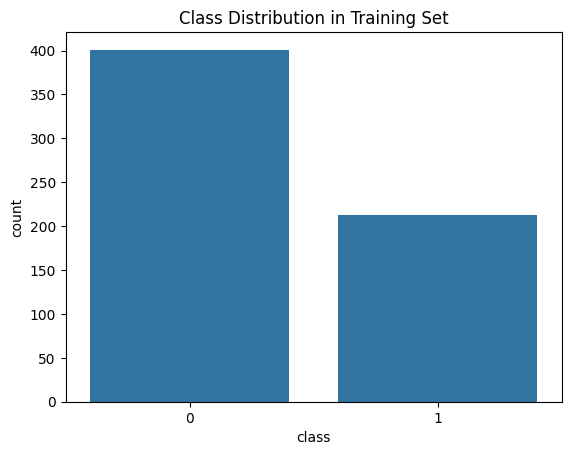

In [29]:
# Visualising the class distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting class distribution
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.show()


The data is imbalanced.

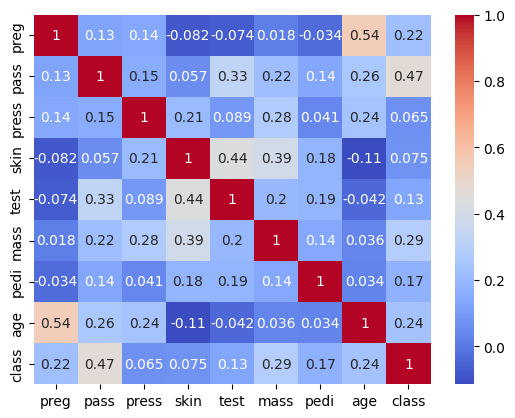

In [34]:
# Plot the correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


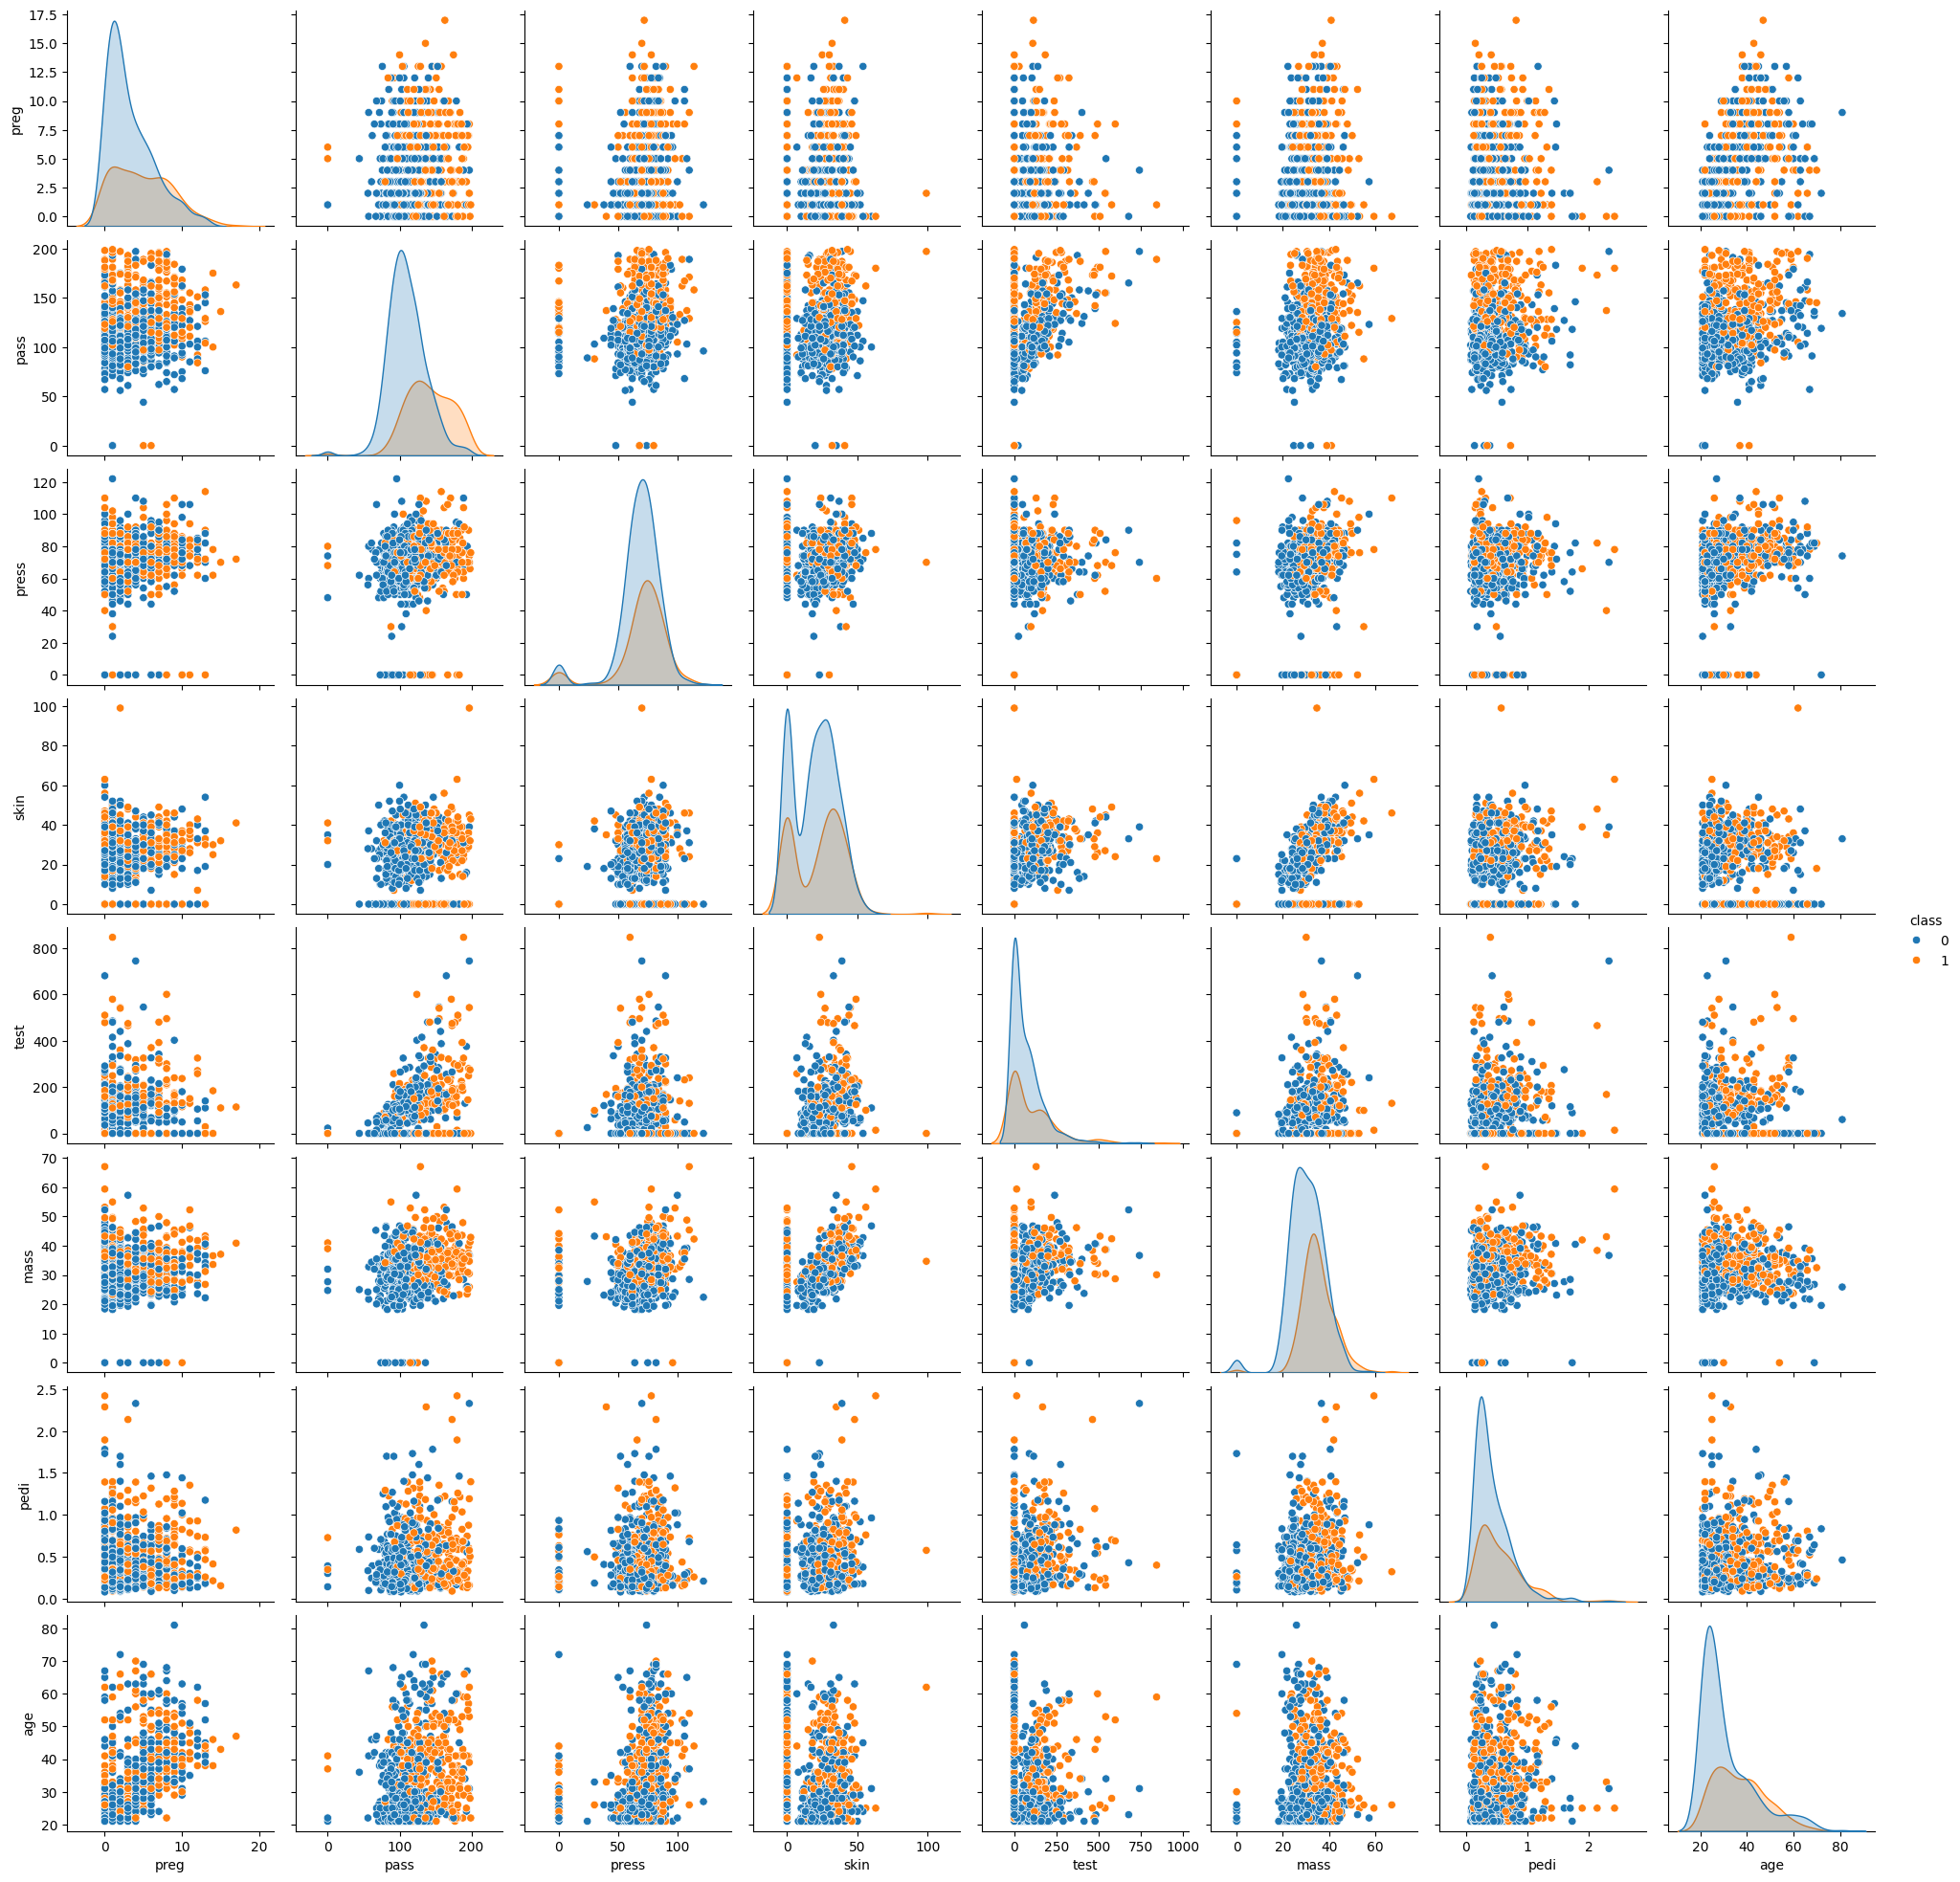

In [37]:
# visualising relation between the target and the features.
sns.pairplot(data, hue='class')
plt.show()


# Using feature engineering to scale the data and then fitting to the svm

In [38]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
# Define SVC model
svc = SVC()

# Define the parameter grid for RBF kernel
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [42]:
# GridSearchCV with cross-validation
grid = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy', refit=True)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [43]:
# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7718931782125859


grid.best_estimator_: This is the best model (SVM with the optimal C and gamma) found by GridSearchCV. It's automatically refitted to the training data.

grid.best_estimator_.predict(X_test): This uses the refitted model (with the best parameters) to predict labels on the test set.

Evaluation:

In [49]:
# Evaluate on the test set
y_pred = grid.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7727
Confusion Matrix:
[[82 17]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



**Inference**
Ealier without scaling the data we got accuracy of 63.6 % with scaling the accuracy has improved to 77.2% also the F1 and Recall scores have improved.

In our case the dataset is imbalanced so F1, recall and ROC-AUC would be better scores to evaluate the model.

In [58]:
# using ROC-AUC score for evaluation
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

ROC-AUC Score: 0.6909090909090908


For ROC curve plot we need probality output from svc model thus creating and traing the svc model

In [59]:
# Create and train the SVC model
model = SVC(probability=True)  # Set probability=True to calculate ROC-AUC
model.fit(X_train, y_train)


SVC(probability=True)

In [60]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


In [62]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

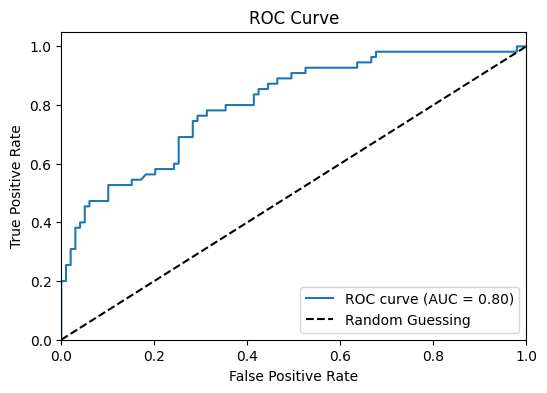

In [63]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Inference **
It is seen that the AUC is 0.8 thus the model is performing good on the data  

# About ROC curve

Components of the ROC Curve

True Positive Rate (TPR): Also known as Sensitivity or Recall, TPR measures the proportion of actual positives that are correctly identified by the model. It's calculated as:

TPR
=
True Positives/
True Positives
+
False Negatives


False Positive Rate (FPR): This measures the proportion of actual negatives that are incorrectly classified as positives. It's calculated as:

FPR
=
False Positives/False Positives+True Negatives
​

Plotting the ROC Curve
The ROC curve plots the TPR against the FPR at various threshold settings.
The x-axis represents the FPR, and the y-axis represents the TPR.
Key Points to Infer from the ROC Curve
Curve Characteristics:

Diagonal Line (Random Classifier): A line from (0,0) to (1,1) indicates random guessing. A good classifier should be above this line.
Above the Diagonal: The model performs better than random guessing; the higher the curve, the better the model's performance.
Area Under the Curve (AUC):

AUC Value: The AUC quantifies the overall performance of the model:

AUC = 1: Perfect model (all positives classified correctly).

AUC = 0.5: No discriminative ability (model performs like random guessing).

AUC < 0.5: Indicates a model that performs worse than random guessing.
Interpretation: A higher AUC indicates a better-performing model. Generally, an AUC greater than 0.7 is considered acceptable, above 0.8 is good, and above 0.9 is excellent.
Threshold Selection:

The ROC curve can help in selecting an optimal threshold for classification. By analyzing the trade-off between TPR and FPR, you can choose a threshold that aligns with your business or clinical objectives.

For example, if minimizing false negatives (e.g., in medical diagnosis) is crucial, you might select a threshold that offers a high TPR, even if it increases the FPR.

Comparing Models:

When you have multiple models, you can compare their ROC curves. The model with the curve that is farthest from the diagonal (and closest to the top-left corner) is generally considered the better model.

Comparing the AUC values provides a numerical way to assess which model performs better.

Specific Points on the Curve:

You can analyze specific points on the ROC curve corresponding to different thresholds to see how the trade-off between TPR and FPR changes. This helps in deciding the best operating point based on the context of your application.